Parameters of the best solution : [0 0 0 0 0 1 1 0 1 1 0 1 0 1 0]
Fitness value of the best solution = 0
Suma liczb z wybranej grupy (1): 252


c:\Python311\Lib\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


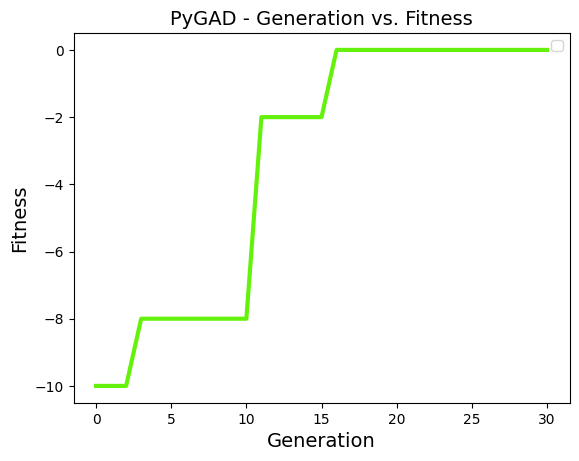

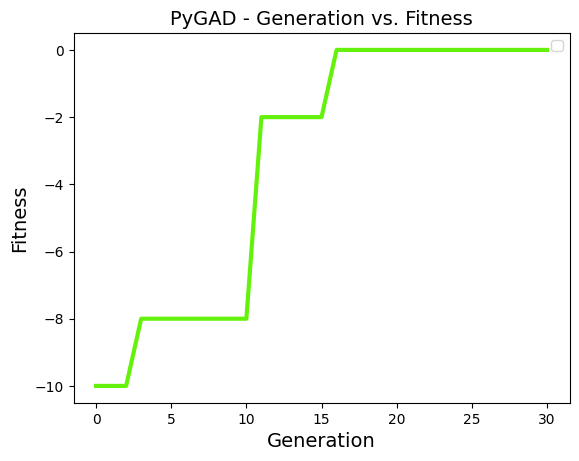

In [11]:
import pygad 
import numpy as np
 
S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80] 
 
#definiujemy parametry chromosomu 
#geny to liczby: 0 lub 1 
gene_space = [0, 1] 
 
#definiujemy funkcję fitness 
def fitness_func(ga_instance, solution, solution_idx):
    sum1 = np.sum(solution * np.array(S))
    solution_invert = 1 - solution
    sum2 = np.sum(solution_invert * np.array(S))
    fitness = -np.abs(sum1 - sum2)  # Chcemy, by różnica sum była jak najmniejsza
    return fitness
 
sol_per_pop = 10 # Liczba chromosomów (rozwiązań) w jednej populacji
num_genes = len(S) #ile genow ma chromosom 
 
num_generations = 30 # Liczba pokoleń
num_parents_mating = 5 # Ilu rodziców wybieramy do rozmnażania
keep_parents = 2  # Ilu najlepszych rodziców zachować bez zmian
 
#jaki typ selekcji rodzicow? 
# sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa 

parent_selection_type = "sss"   # steady-state selection
crossover_type = "single_point" # Krzyżowanie w jednym punkcie
mutation_type = "random"        # Losowa mutacja
mutation_percent_genes = 8      # Mutacja dotyczy 8% genów


#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty 
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_type=int,  # ⬅️ TO DODAJ
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes
)
 
#uruchomienie algorytmu 
ga_instance.run() 
 
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena) 
solution, solution_fitness, solution_idx = ga_instance.best_solution() 
print("Parameters of the best solution : {solution}".format(solution=solution)) 
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness)) 
 
#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki 
selected_sum = np.sum(np.array(S) * solution)
print("Suma liczb z wybranej grupy (1):", selected_sum)
 
#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen 
ga_instance.plot_fitness()